In [1]:
import vrep
import time
import numpy as np
from math import cos, sin
from scipy.linalg import expm,logm
from copy import copy as copy
import hex_helper as hh
import step_3 as ss
import matplotlib.pyplot as plt

In [2]:
# ======================================================================================================= #
# ======================================= Start Simulation ============================================== #
# ======================================================================================================= #

# Close all open connections (Clear bad cache)
vrep.simxFinish(-1)
# Connect to V-REP (raise exception on failure)
clientID = vrep.simxStart('127.0.0.1', 19997, True, True, 5000, 5)
if clientID == -1:
	raise Exception('Failed connecting to remote API server')

print(clientID)
# ======================================== Setup "handle"  =========================================== #
handles, body_handles = hh.init_handles(clientID)

# ======================================== Get a joint angle  ======================================== #
# result, theta1 = vrep.simxGetJointPosition(clientID, handles[0][1], vrep.simx_opmode_blocking)
# if result != vrep.simx_return_ok:
#     raise Exception('could not get 1 joint variable')
#
# print(theta1)
#
# print(vrep.getJointMode(handles[0][0]))

0
[[17, 19, 21], [28, 30, 32], [38, 40, 42], [48, 50, 52], [58, 60, 62], [68, 70, 72]] [24, 35, 45, 55, 65, 75, 27]


In [3]:
# Close all open connections (Clear bad cache)
vrep.simxFinish(-1)
# Connect to V-REP (raise exception on failure)
clientID = vrep.simxStart('127.0.0.1', 19997, True, True, 5000, 5)
if clientID == -1:
	raise Exception('Failed connecting to remote API server')

# Start simulation
vrep.simxStartSimulation(clientID, vrep.simx_opmode_oneshot)

# ******************************** Your robot control code goes here  ******************************** #
#print(get_joint(handles, body_handles))
time.sleep(4)


#vrep.simxSetJointTargetPosition(clientID, handles[5][2], 0, vrep.simx_opmode_oneshot)

# for i in range(6):
#     ss.step_3(ss.get_theta_matrix(np.array(0*np.pi/2)),clientID,handles)
# time.sleep(1)
# for i in range(6):
#     ss.step_3(ss.get_theta_matrix(np.array(1*np.pi/2)),clientID,handles)
# time.sleep(1)
# for i in range(6):
#     ss.step_3(ss.get_theta_matrix(np.array(2*np.pi/2)),clientID,handles)
# time.sleep(1)
# for i in range(6):
#     ss.step_3(ss.get_theta_matrix(np.array(3*np.pi/2)),clientID,handles)
# time.sleep(1)
# for i in range(6):
#     ss.step_3(ss.get_theta_matrix(np.array(np.pi/4)),clientID,handles)
# time.sleep(1)
pos = np.zeros([3,40])

for i in range(40):
    ss.step_3(ss.get_theta_matrix(np.array(i*np.pi/20),0),clientID,handles)
    result,vector=vrep.simxGetObjectPosition(clientID, body_handles[6],-1,vrep.simx_opmode_blocking)
    pos[:,i]=vector
    
# time.sleep(2)


# Stop simulation
vrep.simxStopSimulation(clientID, vrep.simx_opmode_oneshot)
# Before closing the connection to V-REP, make sure that the last command sent out had time to arrive. You can guarantee this with (for example):
vrep.simxGetPingTime(clientID)
# Close the connection to V-REP
vrep.simxFinish(clientID)
print("==================== ** Simulation Ended ** ====================")

# ======================================================================================================= #
# ======================================== End Simulation =============================================== #
# ======================================================================================================= #

==================== ** Simulation Ended ** ====================


In [4]:
a1 = np.array([0.08000001311302185, 0.0, 0.003102347254753113])
a2 = np.array([0.130264550447464, -5.960464477539063e-08, -0.00809653103351593])
a3 = np.array([0.19294512271881104, -5.960464477539063e-08, 0.028100647032260895])
a4 = np.array([0.20402440428733826, -5.125999450683594e-06, -0.08788306266069412])

l2 = np.linalg.norm(a2-a1)
print(l2)
l3 = np.linalg.norm(a3-a2)
print(l3)
le = np.linalg.norm(a4-a3)
print(le)

0.05149697649731044
0.07238155732083357
0.11651167932822327


In [5]:
pos

array([[ 0.45723158,  0.4067893 ,  0.31312901,  0.20647064,  0.09818526,
        -0.05072034, -0.19104163, -0.36479449, -0.5583083 , -0.76310724,
        -0.97140598, -1.1620295 , -1.35429788, -1.51579201, -1.65273845,
        -1.75662756, -1.83552873, -1.90997553, -1.94871759, -1.95031643,
        -1.93207967, -1.8692975 , -1.76559448, -1.62701321, -1.47449517,
        -1.29732108, -1.11157513, -0.92874503, -0.75337499, -0.56981862,
        -0.41379124, -0.24691662, -0.10465397,  0.05101953,  0.17667022,
         0.30518994,  0.39778045,  0.45814672,  0.49577624,  0.4973492 ],
       [ 0.1770974 ,  0.34819239,  0.53881764,  0.71985167,  0.86300367,
         0.99645168,  1.08498836,  1.17092824,  1.22086227,  1.25334132,
         1.27086389,  1.26383412,  1.22557664,  1.13288105,  0.9858796 ,
         0.83024484,  0.67027235,  0.4826265 ,  0.30371702,  0.10003172,
        -0.09266505, -0.27899075, -0.46242282, -0.62282819, -0.76121044,
        -0.87825245, -0.96203655, -1.00037372, -1.

(-1.375, 1.375)

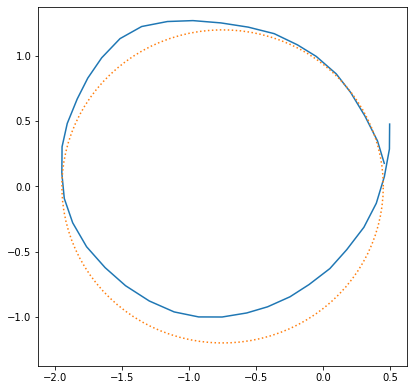

In [6]:
posxy = pos[0:2,:]

theta = np.linspace(0, 2*np.pi, 100)
circx = 1.2*np.cos(theta)-0.75
circy = 1.2*np.sin(theta)

plt.figure(figsize=[6.6,6.6])
plt.plot(posxy[0,:],posxy[1,:])
plt.plot(circx,circy,linestyle='dotted')
plt.xlim(-2.125, 0.625)
plt.ylim(-1.375, 1.375)